In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-nutrition/McDonaldsMenuNutrition.csv


In [16]:
df=pd.read_csv('/kaggle/input/mcdonalds-nutrition/McDonaldsMenuNutrition.csv')

In [17]:
df.head()

,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,Cheeseburger,300.0,110.0,12.0,6,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,Double Cheeseburger,440.0,210.0,23.0,11,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,McDouble,390.0,170.0,19.0,8,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,Quarter Pounder® with Cheese,510.0,230.0,26.0,12,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0


In [18]:
df.columns

Index(['Item', 'Calories', 'Calories from\nFat', 'Total Fat\n(g)',
       'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)',
       'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)',
       'Protein\n(g)', 'Weight Watchers\nPnts'],
      dtype='object')

In [19]:
df.describe()

,Calories,Calories from\nFat,Total Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
count,328.000000,325.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,325.000000
mean,284.618902,88.800000,9.987805,0.193598,40.228659,338.460366,40.009146,0.881098,28.103659,9.432927,306.426154
std,218.601528,99.605425,11.046254,0.475570,79.274382,436.204780,30.975820,1.444554,28.574837,9.412160,232.483311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,5.000000,85.000000,20.000000,0.000000,6.000000,2.000000,153.500000
50%,235.000000,60.000000,7.000000,0.000000,20.000000,145.000000,36.000000,0.000000,18.000000,7.000000,267.000000
75%,390.000000,150.000000,16.250000,0.000000,40.000000,350.000000,49.250000,1.250000,43.000000,13.000000,395.000000
max,1160.000000,540.000000,60.000000,2.500000,575.000000,2260.000000,203.000000,7.000000,168.000000,48.000000,1317.000000


/tmp/ipykernel_33/3855497462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.iloc[:,1:].corr()


<Axes: >

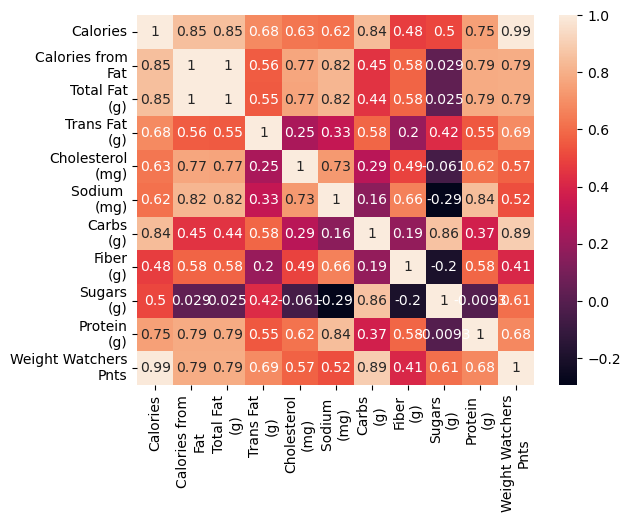

In [20]:
import seaborn as sns
cor=df.iloc[:,1:].corr()
sns.heatmap(cor,annot=True)

# Total fat and Calories from fat are fully correlated

In [21]:
df.isna().sum()

Item                     0
Calories                 2
Calories from\nFat       5
Total Fat\n(g)           2
Saturated Fat\n(g)       2
Trans Fat\n(g)           2
Cholesterol\n(mg)        2
Sodium \n(mg)            2
Carbs\n(g)               2
Fiber\n(g)               2
Sugars\n(g)              2
Protein\n(g)             2
Weight Watchers\nPnts    5
dtype: int64

In [22]:
df.dtypes

Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)        object
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object

In [23]:
# from  statsmodels.stats.outliers_influence import variable_inflation_factor
# pred=df[['Calories','']]

In [24]:
df.columns

Index(['Item', 'Calories', 'Calories from\nFat', 'Total Fat\n(g)',
       'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)',
       'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)',
       'Protein\n(g)', 'Weight Watchers\nPnts'],
      dtype='object')

In [25]:
df.dropna(axis=1,how='all')

,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,Cheeseburger,300.0,110.0,12.0,6,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,Double Cheeseburger,440.0,210.0,23.0,11,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,McDouble,390.0,170.0,19.0,8,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,Quarter Pounder® with Cheese,510.0,230.0,26.0,12,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Strawberry Banana Smoothie (Medium),260.0,5.0,1.0,0,0.0,5.0,40.0,60.0,3.0,54.0,2.0,312.0
326,Strawberry Banana Smoothie (Small),210.0,5.0,0.5,0,0.0,5.0,35.0,49.0,2.0,44.0,2.0,252.0
327,Wild Berry Smoothie (Large),320.0,10.0,1.0,0.5,0.0,5.0,45.0,75.0,4.0,69.0,3.0,386.5
328,Wild Berry Smoothie (Medium),260.0,5.0,1.0,0,0.0,5.0,35.0,60.0,4.0,55.0,3.0,312.0


In [26]:
df.dtypes

Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)        object
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object

In [27]:
df['Saturated Fat\n(g)']=df['Saturated Fat\n(g)'].str.replace('g','')
df['Saturated Fat\n(g)']=df['Saturated Fat\n(g)'].astype(float)

In [28]:
df.isna().sum()

Item                     0
Calories                 2
Calories from\nFat       5
Total Fat\n(g)           2
Saturated Fat\n(g)       2
Trans Fat\n(g)           2
Cholesterol\n(mg)        2
Sodium \n(mg)            2
Carbs\n(g)               2
Fiber\n(g)               2
Sugars\n(g)              2
Protein\n(g)             2
Weight Watchers\nPnts    5
dtype: int64

In [29]:
for i in df.iloc[:,1:].columns:
    df[i]=df[i].fillna(value=df[i].mean())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

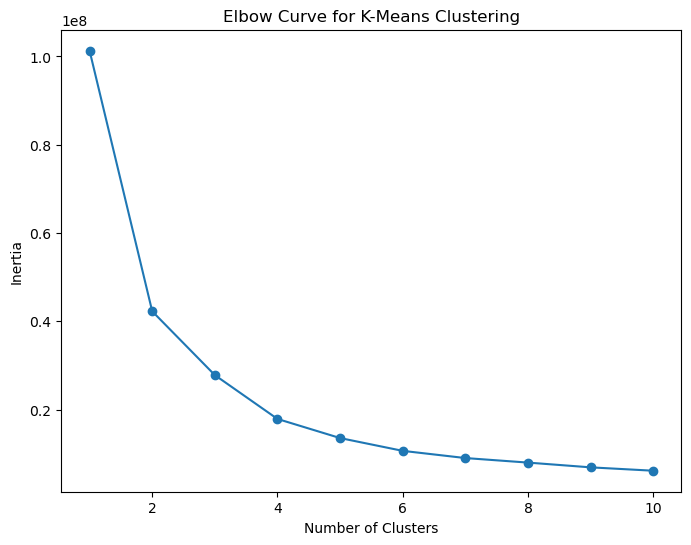

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



# Calculate inertia for different number of clusters
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df.iloc[:,1:])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering')
plt.show()


In [31]:
k=3# number of clusters

In [32]:
km1=KMeans(n_clusters=3,random_state=0)

In [33]:
df1=df.iloc[:,1:]

In [34]:
km1.fit(df1)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [35]:
y_pr=km1.predict(df1)

In [36]:
y_pr

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [37]:
df1['tar']=y_pr

In [38]:
df1['tar']

0      0
1      2
2      2
3      2
4      2
      ..
325    0
326    0
327    0
328    0
329    0
Name: tar, Length: 330, dtype: int32

In [39]:
df['tar']=df1['tar']

In [40]:
grp=df1.groupby('tar').sum()

In [41]:
for i in (df['tar'].unique()):
    print(df[df['tar']==i].describe())

         Calories  Calories from\nFat  Total Fat\n(g)  Saturated Fat\n(g)  \
count  231.000000          231.000000      231.000000          231.000000   
mean   176.771592           38.252814        4.337557            2.166007   
std    101.545826           41.702318        4.741072            2.437598   
min      0.000000            0.000000        0.000000            0.000000   
25%    100.000000            0.000000        0.000000            0.000000   
50%    180.000000           30.000000        3.000000            1.500000   
75%    250.000000           70.000000        8.000000            3.750000   
max    420.000000          170.000000       19.000000            9.000000   

       Trans Fat\n(g)  Cholesterol\n(mg)  Sodium \n(mg)  Carbs\n(g)  \
count      231.000000         231.000000     231.000000  231.000000   
mean         0.016828          11.690291     126.133856   30.753326   
std          0.087465          11.844565     115.418118   19.416630   
min          0.000000 

In [42]:
grp.head()

,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
tar,,,,,,,,,,,,
0,40834.237805,8836.4,1001.97561,500.347561,3.887195,2700.457317,29136.920732,7104.018293,86.762195,6117.207317,1098.865854,46263.278462
1,20640.000000,5680.0,632.00000,371.500000,32.500000,1865.000000,7645.000000,3317.000000,29.000000,2694.000000,417.000000,23288.500000
2,32450.000000,14787.6,1662.00000,588.000000,27.500000,8710.000000,74910.000000,2782.000000,175.000000,463.000000,1597.000000,31568.852308


In [43]:
df.columns

Index(['Item', 'Calories', 'Calories from\nFat', 'Total Fat\n(g)',
       'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)',
       'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)',
       'Protein\n(g)', 'Weight Watchers\nPnts', 'tar'],
      dtype='object')

In [44]:
df[df['tar']==0]['Item']

0                                Hamburger
34                      Small French Fries
35                     Medium French Fries
37                          Ketchup Packet
38                             Salt Packet
                      ...                 
325    Strawberry Banana Smoothie (Medium)
326     Strawberry Banana Smoothie (Small)
327            Wild Berry Smoothie (Large)
328           Wild Berry Smoothie (Medium)
329            Wild Berry Smoothie (Small)
Name: Item, Length: 231, dtype: object

# THE ABOVE ITEMS AT MC DONALD'S where are healthy compared to other clusters of items 